In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import seaborn as sns, pandas as pd, numpy as np


In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [4]:
data.dtypes.value_counts()

float64    561
object       1
Name: count, dtype: int64

In [5]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [8]:
data.iloc[:,:-1].min().value_counts()

-1.0    561
Name: count, dtype: int64

In [9]:
data.iloc[:,:-1].max().value_counts()

1.0    561
Name: count, dtype: int64

In [11]:
data.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder


In [16]:
le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

7835    2
159     5
1271    4
8814    3
5864    5
Name: Activity, dtype: int64

In [21]:
features_cols = data.columns[:-1]
corr_values = data[features_cols].corr()



In [25]:
tril_index = np.tril_indices_from(corr_values)

for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.nan

In [26]:
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

corr_values['abs_correlation'] = corr_values.correlation.abs()

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

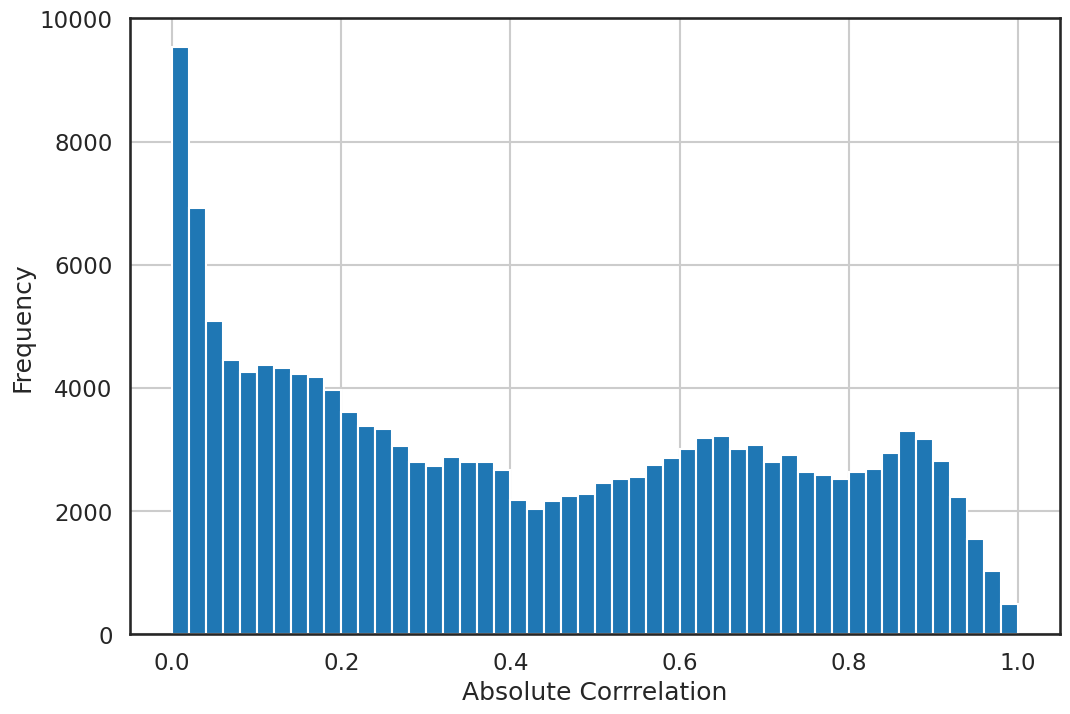

In [29]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12,8))
ax.set(xlabel='Absolute Corrrelation', ylabel = 'Frequency')
plt.show()

In [32]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                       test_size=0.3,
                       random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[features_cols], data.Activity))

X_train = data.loc[train_idx, features_cols]
y_train = data.loc[train_idx, 'Activity']

X_test = data.loc[test_idx, features_cols]
y_test = data.loc[test_idx, 'Activity']


In [41]:
y_train.value_counts(normalize=True)

Activity
0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: proportion, dtype: float64

In [42]:
from sklearn.linear_model import LogisticRegression


In [43]:
lr = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [45]:
from sklearn.linear_model import LogisticRegressionCV
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)


In [46]:
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)


In [58]:
coefficients = list()

coeff_labels = ['lr', 'l1' , 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab, mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels = [[lab], [0,1,2,3,4,5]],
                                codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))


coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                     l1  \
            0         1         2         3         4         5    0   
145 -0.155411  2.271741 -2.231297  0.071028 -0.719628  0.240200  0.0   
143 -0.201758 -0.080515  0.147956 -0.714692  0.981977  0.196261  0.0   
220  0.086239  0.303737 -0.041841 -0.098603  0.069837 -0.896923  0.0   
352 -0.030727  0.087008 -0.243218  0.171536  0.264045 -0.488313  0.0   
531  0.018658  0.479813 -0.184346  0.329495  0.063496 -0.214956  0.0   
195 -0.114347 -0.349342  0.270734 -0.312581  0.388129 -0.001026  0.0   
398 -0.012117  0.184953  0.200984  0.156290 -0.173779  0.117448  0.0   
171 -0.047500  0.007660  0.423715 -0.126340  0.926240 -0.960316  0.0   
553 -0.173055  0.014061  0.192994  0.285926 -0.800609  0.393219  0.0   
417 -0.024718 -0.033486  0.039561 -0.130310  0.284707 -0.082557  0.0   

                                                             l2            \
            1         2         3         4         5         0         1   
145  5.382657 -5.580470  0.000000 -1.670671  1.711548 -0.283779  3.142246   
143 -0.719996  0.128593 -0.627636  3.495459 -0.302456 -0.393549 -0.292874   
220  0.000000  0.000000  0.000000  0.231501 -2.844751  0.158578  0.633011   
352  0.000000  0.000000  0.000000  0.454286 -0.534253 -0.057084  0.202844   
531  0.567097  0.000000  0.219261  0.619966 -0.619153  0.044323  0.671521   
195 -2.744885  2.164897  0.000000  0.527802 -0.755990 -0.251373 -1.165162   
398  0.000000  0.000000  0.140845 -0.109194  0.231643 -0.040859  0.267167   
171  0.000000  0.832881  0.000000  1.148324 -1.967568 -0.094489 -0.007692   
553  0.000000  0.137203  0.000000 -0.739081  0.939521 -0.500283 -0.244943   
417  0.000000  0.000000  0.000000  0.000000 -0.071607 -0.056193 -0.073072   

                                             
            2         3         4         5  
145 -3.047358  0.055876 -1.447998  1.917148  
143  0.224314 -1.913823  2.002939 -0.035144  
220 -0.178348  0.001715  0.103591 -3.374310  
352 -0.383023  0.495650  0.533310 -1.832770  
531 -0.372714  0.933042  0.338871 -0.860859  
195  0.998662 -0.657660  0.599033  0.128517  
398  0.285402  0.301254 -0.442229  0.467901  
171  0.703929 -0.440163  1.720634 -3.655063  
553  0.476803  0.059755 -1.173029  0.775571  
417  0.039765 -0.494409  0.450261 -0.055295

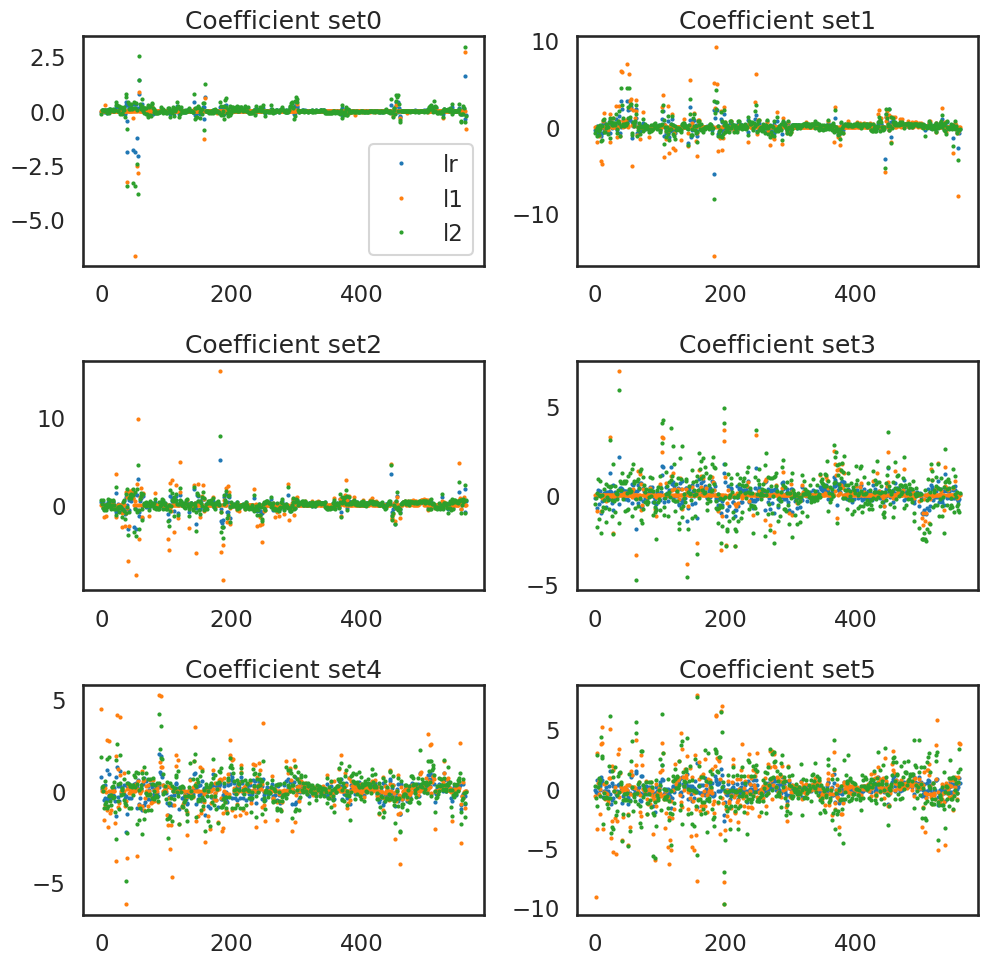

In [59]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()

fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]

    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker = 'o', ls='', ms=2.0, ax=ax, legend=False)

    if ax is axList[0]:
        ax.legend(loc=4)

    ax.set(title="Coefficient set" + str(loc))

plt.tight_layout()
plt.show()

In [62]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [63]:
y_prob.head()

,lr,l1,l2
0,0.998939,0.998929,0.999734
1,0.988165,0.999415,0.999490
2,0.987592,0.995201,0.997566
3,0.981381,0.999193,0.994277
4,0.998277,0.999918,0.999618


In [64]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [68]:
metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [73]:
metrics

,lr,l1,l2
precision,0.984144,0.983514,0.983825
recall,0.984142,0.983495,0.983819
fscore,0.984143,0.983492,0.983818
accuracy,0.984142,0.983495,0.983819
auc,0.990384,0.989949,0.990162


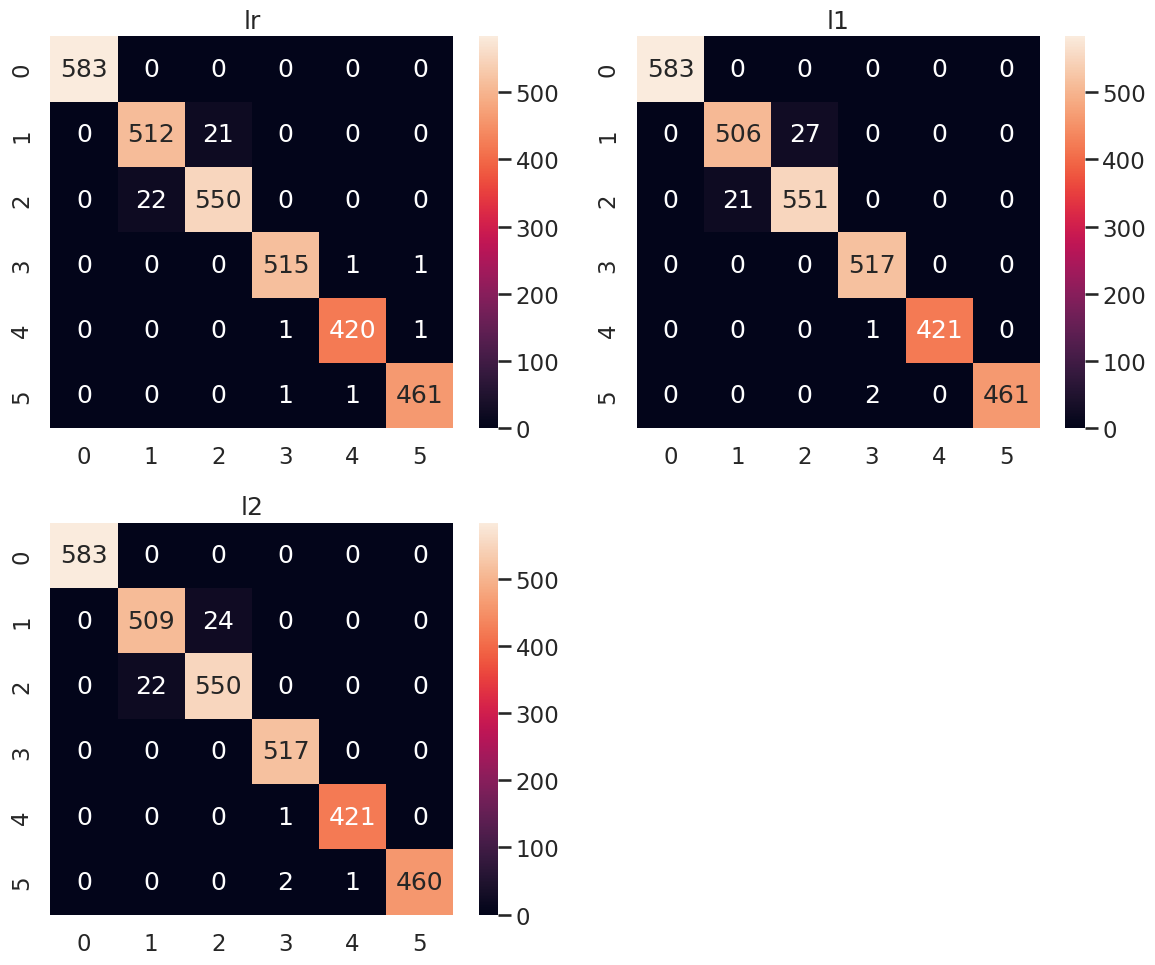

In [74]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()
plt.show()
